# Crop Yield Prediction

## Preprocessing steps
1. Acquire the dataset
2. Import all the crucial libraries
3. Import the dataset
4. Identifying and handling the missing values
5. Encoding the categorical data
6. Splitting the dataset
7. Feature scaling

## Model Buildig
8. Import algorithm
9. Model fitting
10. Model prediction
11. Model performance with test data

## Hyper parameter tuning
12. GridsearchCV

# Preprocessing

## 1. Acquire the Dataset
### From kaggle - Crop yield prediction

## 2. Importing libraries

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 3. Import the dataset

In [2]:
#loading the datasets
Temp = pd.read_csv('Crop-Yield-Prediction-Datasets/temp.csv')
Yield = pd.read_csv('Crop-Yield-Prediction-Datasets/yield.csv')
Pesticides = pd.read_csv('Crop-Yield-Prediction-Datasets/pesticides.csv')
Rainfall = pd.read_csv('Crop-Yield-Prediction-Datasets/rainfall.csv')

In [3]:
Temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [4]:
Temp.tail()

,year,country,avg_temp
71306,2009,Mexico,21.76
71307,2010,Mexico,20.90
71308,2011,Mexico,21.55
71309,2012,Mexico,21.52
71310,2013,Mexico,22.19


In [5]:
Temp['country'].nunique()

137

In [6]:
Temp.groupby('country').count()

,year,avg_temp
country,,
Afghanistan,181,179
Albania,271,267
Algeria,261,261
Angola,158,148
Argentina,318,318
...,...,...
Uzbekistan,182,182
Venezuela,950,874
Vietnam,363,348


In [7]:
Temp = Temp.rename(index=str, columns={"year": "Year", "country":'Area'})
Temp.head()

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [8]:
Yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [9]:
Yield.tail()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
56712,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2012,2012,hg/ha,24420
56713,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2013,2013,hg/ha,22888
56714,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2014,2014,hg/ha,21357
56715,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2015,2015,hg/ha,19826
56716,QC,Crops,181,Zimbabwe,5419,Yield,15,Wheat,2016,2016,hg/ha,18294


In [10]:
# rename columns.
Yield = Yield.rename(index=str, columns={"Value": "Yield-hg/ha"})
Yield.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Yield-hg/ha
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [11]:
Yield['Domain'].nunique()

1

In [12]:
Yield['Area'].nunique()

212

In [13]:
Yield['Element'].nunique()

1

In [14]:
Yield['Item'].nunique()

10

In [15]:
Yield['Unit'].nunique()

1

In [16]:
# drop unwanted columns.
Yield = Yield.drop(['Year Code','Element Code','Element','Year Code','Area Code','Domain Code','Domain','Unit','Item Code'], axis=1)
Yield.head()

,Area,Item,Year,Yield-hg/ha
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [17]:
Pesticides.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [18]:
Pesticides.tail()

,Domain,Area,Element,Item,Year,Unit,Value
4344,Pesticides Use,Zimbabwe,Use,Pesticides (total),2012,tonnes of active ingredients,3375.53
4345,Pesticides Use,Zimbabwe,Use,Pesticides (total),2013,tonnes of active ingredients,2550.07
4346,Pesticides Use,Zimbabwe,Use,Pesticides (total),2014,tonnes of active ingredients,2185.07
4347,Pesticides Use,Zimbabwe,Use,Pesticides (total),2015,tonnes of active ingredients,2185.07
4348,Pesticides Use,Zimbabwe,Use,Pesticides (total),2016,tonnes of active ingredients,2185.07


In [19]:
Pesticides['Domain'].nunique()

1

In [20]:
Pesticides['Area'].nunique()

168

In [21]:
Pesticides['Element'].nunique()

1

In [22]:
Pesticides['Item'].nunique()

1

In [23]:
Pesticides['Year'].nunique()

27

In [24]:
Pesticides['Unit'].nunique()

1

In [25]:
Pesticides = Pesticides.drop(['Element','Domain','Unit','Item'], axis=1)

In [26]:
Pesticides.head()

,Area,Year,Value
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [27]:
Pesticides = Pesticides.rename(index=str, columns={"Value": "pesticides_tonnes"})

In [28]:
Pesticides.head()

,Area,Year,pesticides_tonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [29]:
Pesticides.describe()

,Year,pesticides_tonnes
count,4349.000000,4.349000e+03
mean,2003.138883,2.030334e+04
std,7.728044,1.177362e+05
min,1990.000000,0.000000e+00
25%,1996.000000,9.300000e+01
50%,2003.000000,1.137560e+03
75%,2010.000000,7.869000e+03
max,2016.000000,1.807000e+06


In [30]:
Rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [31]:
Rainfall.tail()

,Area,Year,average_rain_fall_mm_per_year
6722,Zimbabwe,2013,657
6723,Zimbabwe,2014,657
6724,Zimbabwe,2015,657
6725,Zimbabwe,2016,657
6726,Zimbabwe,2017,657


In [32]:
Yield.columns

Index(['Area', 'Item', 'Year', 'Yield-hg/ha'], dtype='object')

In [33]:
Rainfall.columns

Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')

In [34]:
Rainfall = Rainfall.rename(index=str, columns={" Area": 'Area'})
Rainfall.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [35]:
Rainfall['average_rain_fall_mm_per_year'].nunique()

173

In [36]:
Rainfall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area                           6727 non-null   object
 1   Year                           6727 non-null   int64 
 2   average_rain_fall_mm_per_year  5953 non-null   object
dtypes: int64(1), object(2)
memory usage: 210.2+ KB


In [37]:
# convert average_rain_fall_mm_per_year from object to float
Rainfall['average_rain_fall_mm_per_year'] = pd.to_numeric(Rainfall['average_rain_fall_mm_per_year'],errors = 'coerce')
Rainfall.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6727 entries, 0 to 6726
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           6727 non-null   object 
 1   Year                           6727 non-null   int64  
 2   average_rain_fall_mm_per_year  5947 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 210.2+ KB


## 4. Identifying and handling the missing values

In [38]:
Rainfall = Rainfall.dropna()

In [39]:
Rainfall.describe()

,Year,average_rain_fall_mm_per_year
count,5947.000000,5947.000000
mean,2001.365899,1124.743232
std,9.526335,786.257365
min,1985.000000,51.000000
25%,1993.000000,534.000000
50%,2001.000000,1010.000000
75%,2010.000000,1651.000000
max,2017.000000,3240.000000


In [40]:
# merge yield dataframe with rain dataframe by year and area columns 
Yield = pd.merge(Yield, Rainfall, on=['Year','Area'])

In [41]:
Yield.shape

(25385, 5)

In [42]:
Yield.head()

,Area,Item,Year,Yield-hg/ha,average_rain_fall_mm_per_year
0,Afghanistan,Maize,1985,16652,327.0
1,Afghanistan,Potatoes,1985,140909,327.0
2,Afghanistan,"Rice, paddy",1985,22482,327.0
3,Afghanistan,Wheat,1985,12277,327.0
4,Afghanistan,Maize,1986,16875,327.0


In [43]:
Yield.describe()

,Year,Yield-hg/ha,average_rain_fall_mm_per_year
count,25385.000000,25385.000000,25385.000000
mean,2001.278787,68312.278353,1254.849754
std,9.143915,75213.292733,804.449430
min,1985.000000,50.000000,51.000000
25%,1994.000000,17432.000000,630.000000
50%,2001.000000,38750.000000,1150.000000
75%,2009.000000,94286.000000,1761.000000
max,2016.000000,554855.000000,3240.000000


In [44]:
Pesticides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4349 entries, 0 to 4348
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               4349 non-null   object 
 1   Year               4349 non-null   int64  
 2   pesticides_tonnes  4349 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 135.9+ KB


In [45]:
Yield = pd.merge(Yield, Pesticides, on=['Year','Area'])
Yield.head()

,Area,Item,Year,Yield-hg/ha,average_rain_fall_mm_per_year,pesticides_tonnes
0,Albania,Maize,1990,36613,1485.0,121.0
1,Albania,Potatoes,1990,66667,1485.0,121.0
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0
3,Albania,Sorghum,1990,12500,1485.0,121.0
4,Albania,Soybeans,1990,7000,1485.0,121.0


In [46]:
Yield.shape

(18949, 6)

In [47]:
Yield = pd.merge(Yield,Temp, on=['Area','Year'])
Yield.head()

,Area,Item,Year,Yield-hg/ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [48]:
Yield.shape

(28242, 7)

## Final dataset after merging (7columns and 28,242 rows)
#### After  droping the null values

In [49]:
Yield.describe()

,Year,Yield-hg/ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [50]:
Yield['Item'].nunique()

10

In [51]:
Yield['Area'].nunique()

101

In [52]:
Yield.groupby('Area').count()

,Item,Year,Yield-hg/ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Area,,,,,,
Albania,99,99,99,99,99,99
Algeria,114,114,114,114,114,114
Angola,164,164,164,164,164,164
Argentina,368,368,368,368,368,368
Armenia,63,63,63,63,63,63
...,...,...,...,...,...,...
Ukraine,126,126,126,126,126,126
United Kingdom,230,230,230,230,230,230
Uruguay,161,161,161,161,161,161


In [53]:
Yield.groupby('Area').sum()

,Year,Yield-hg/ha,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Area,,,,,
Albania,198071,5711536,147015.0,59522.64,1613.71
Algeria,228171,6711464,10146.0,481850.98,1993.27
Angola,328374,5722563,165640.0,9299.00,3987.06
Argentina,736528,32864032,217488.0,24998041.28,6516.72
Armenia,126156,4524100,35406.0,8734.71,603.60
...,...,...,...,...,...
Ukraine,252312,5496901,71190.0,5863471.80,1060.08
United Kingdom,460330,55419990,280600.0,6476671.40,2208.64
Uruguay,322231,9539820,209300.0,1284138.31,2733.92


In [54]:
Yield.groupby(['Area'],sort=True)['Yield-hg/ha'].sum().nlargest(10)

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: Yield-hg/ha, dtype: int64

In [55]:
Yield.groupby(['Item','Area'],sort=True)['Yield-hg/ha'].sum().nlargest(10)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: Yield-hg/ha, dtype: int64

## Data Visualization

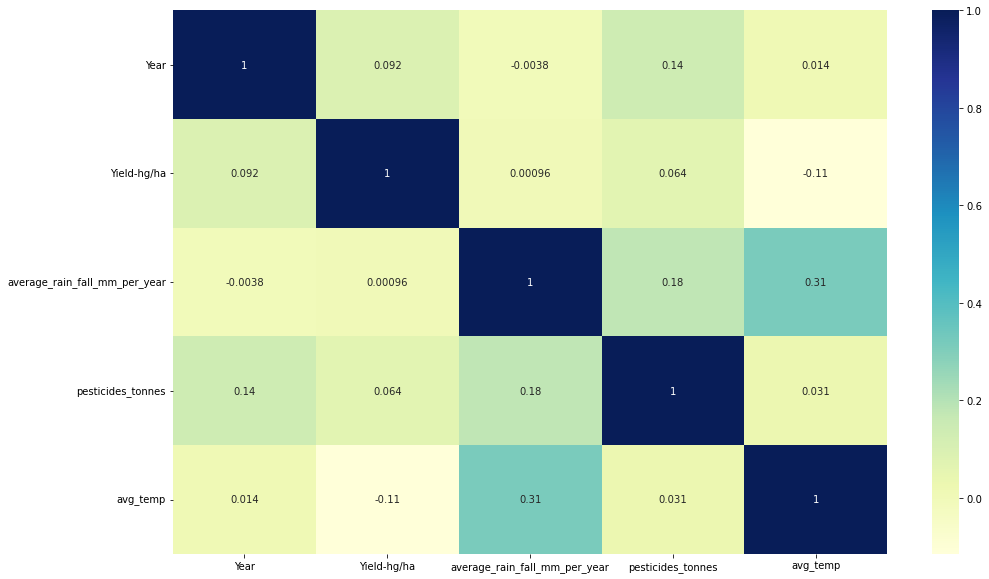

In [56]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(Yield.corr(), annot = True, cmap="YlGnBu")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

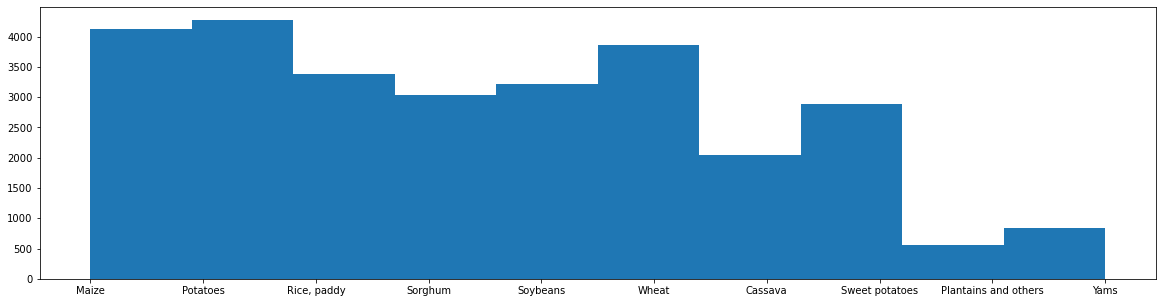

In [57]:
plt.figure(figsize=(20,5))
plt.hist(Yield['Item'])
plt.show

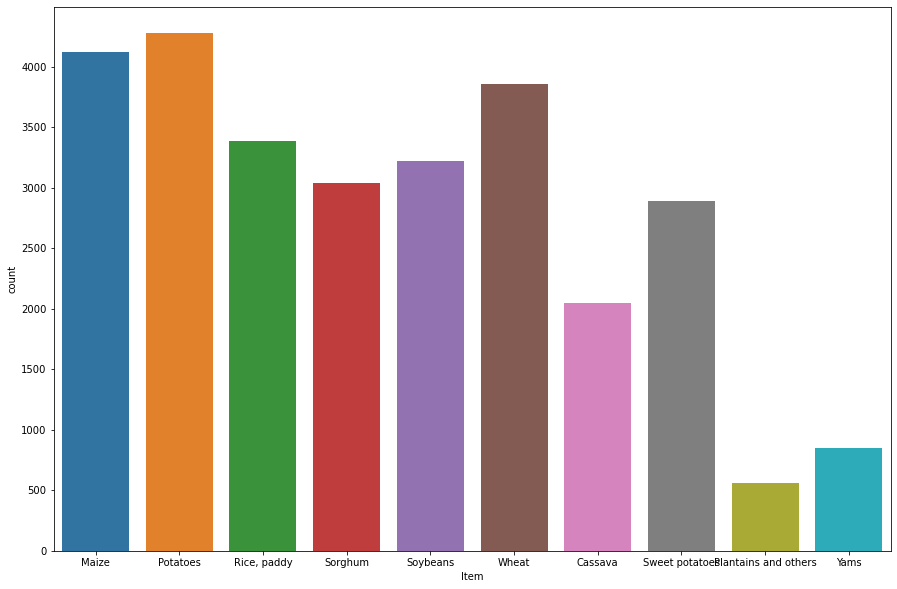

In [58]:
fig, ax = plt.subplots(figsize=(15,10))
y_count=sns.countplot(x='Item',data=Yield, ax = ax)

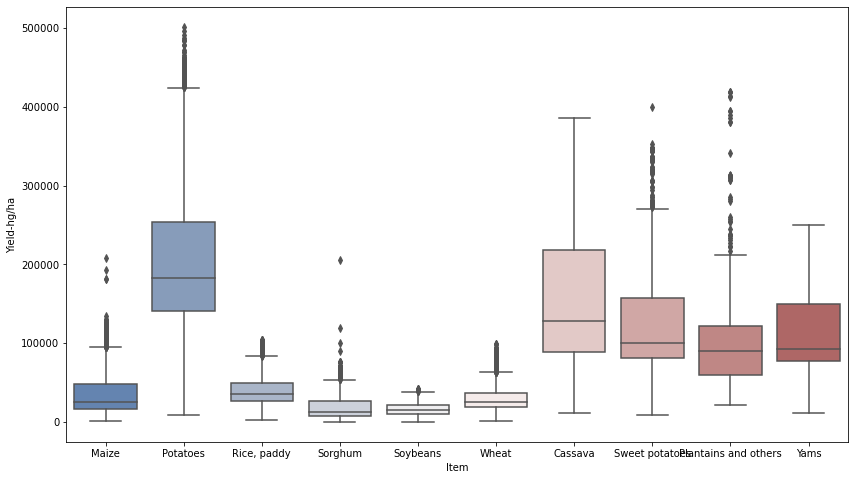

In [59]:
#Boxplot that shows yield for each item 

fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x="Item",y="Yield-hg/ha",palette="vlag",data=Yield,ax=ax);

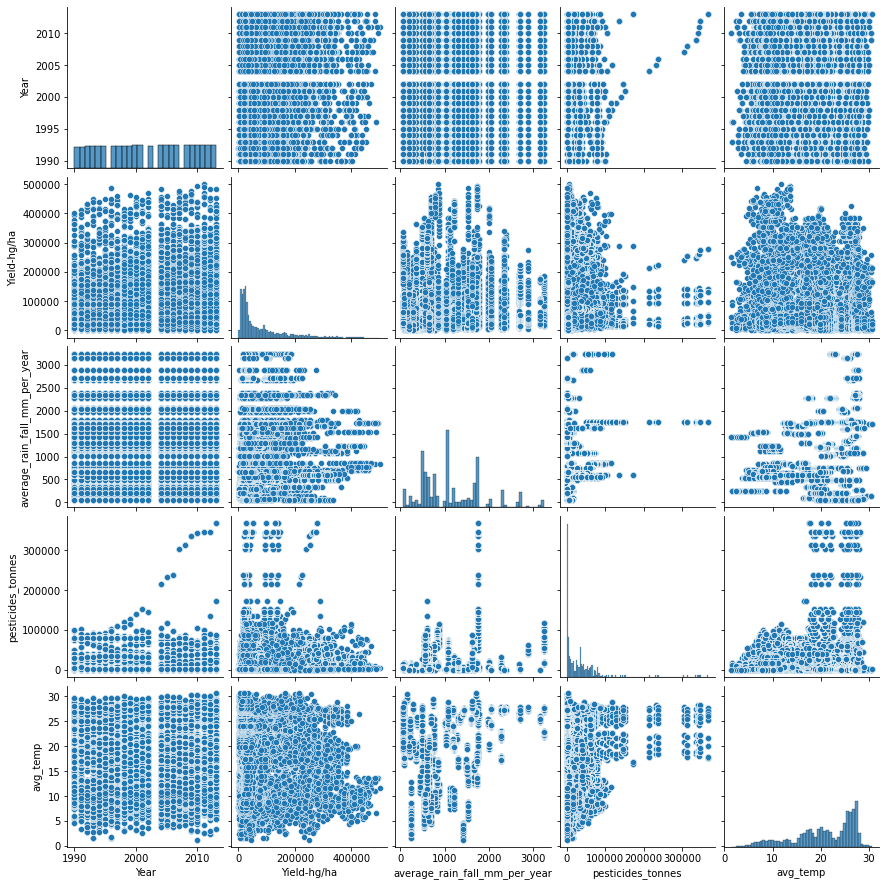

In [60]:
sns.pairplot(Yield)

## 5. Encoding the categorical data

In [61]:
Yield_ohe = pd.get_dummies(Yield, columns=['Area',"Item"], prefix = ['Country',"Item"])
X=Yield_ohe.loc[:, Yield_ohe.columns != 'Yield-hg/ha']
Y=Yield['Yield-hg/ha']
X.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1990,1485.0,121.0,16.37,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Columns: 115 entries, Year to Item_Yams
dtypes: float64(3), int64(1), uint8(111)
memory usage: 5.1 MB


## 6. Splitting the dataset

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

## 7. Feature scaling

In [64]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [65]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test) 

## Model Building

### 8. Import algorithm

In [66]:
from sklearn.linear_model import Lasso
sk_model = Lasso(alpha=10)

### 9. Model fitting

In [67]:
sk_model.fit(X_train, y_train)

Lasso(alpha=10)

In [68]:
sk_model.score(X_train, y_train)*100

75.3369646884346

### 10. Model prediction

In [69]:
y_pred = sk_model.predict(X_test)

### 11. Model performance with test data

In [70]:
from sklearn import metrics
print('Lasso')
print('r2_score', metrics.r2_score(y_test,y_pred)*100)
score = metrics.r2_score(y_test,y_pred)
a_r2 = 1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2_score',a_r2*100)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Lasso
r2_score 76.00363616076882
Adjusted_r2_score 75.67342414192095
MAE: 29181.553005601636
MSE: 1778645810.1022773
RMSE: 42173.994476481326


# Hyper parameter Tuning

### 12. GridsearchCV

In [71]:
#gridsearchcv
from sklearn.model_selection import GridSearchCV,KFold,cross_val_score
folds=KFold(n_splits=5,shuffle=True,random_state=42)
params = {'alpha':[0.001,0.01,1.0,5.0,10.0]}

model = Lasso()

model_cv = GridSearchCV(estimator=model,param_grid=params,scoring='r2',cv=folds,return_train_score=True,verbose=0)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 5.0, 10.0]},
             return_train_score=True, scoring='r2')

In [72]:
model_cv.best_params_

{'alpha': 1.0}

In [73]:
y_pred_grid = model_cv.predict(X_test)

In [74]:
from sklearn import metrics

# R squared error
score_1 = metrics.r2_score(y_test, y_pred_grid)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(y_test, y_pred_grid)

# Mean Absolute Error
score_3 = metrics.mean_squared_error(y_test, y_pred_grid)

# Mean Absolute Error
score_4 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_grid))

print("R squared error for grid : ", score_1*100)
a_r2 = 1-(1-score_1)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print('Adjusted_r2_score',a_r2*100)
print('Mean Absolute Error for grid: ', score_2)
print('Mean Squared Error for grid: ', score_3)
print('Root Mean Squared Error for grid: ', score_4)

R squared error for grid :  76.07536067215756
Adjusted_r2_score 75.74613564850051
Mean Absolute Error for grid:  29319.35440229607
Mean Squared Error for grid:  1773329483.7405875
Root Mean Squared Error for grid:  42110.91881852719
